# PROJECT OVERVIEW
<hr style="border:1px solid black">

“It is essential for a company to always analyze its business performance. On this occasion, we will delve deeper into business in the hospitality sector. Our focus is to find out how our customers behave in making hotel reservations and its relationship to the rate of cancellation of hotel reservations. We will present the results of the insights we find in data visualization to make it easier to understand and more persuasive.”

<br>
<br>
<hr style="border:2px solid black">
<hr style="border:6px solid black">
<br>

# IMPORT MODULES AND DATA
<hr style="border:1px solid black">

## Import Modules

In [1]:
#! pip install --upgrade "kaleido==0.1.*"

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import skew
import kaleido

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
%matplotlib inline

In [5]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Import Data

In [6]:
dfhotel = pd.read_csv('hotel_bookings_data.csv')
dfhotel.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
62651,City Hotel,1,54,2019,March,3,18,0,3,2,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,Non Refund,171.0,NaN,0,Personal,65.0,0,0,Canceled
432,Resort Hotel,0,57,2017,September,29,15,0,2,2,0.0,0,Full Board,Kota Denpasar,Groups,Direct,0,0,0,0,No Deposit,305.0,NaN,0,Family,107.0,0,0,Check-Out
115695,City Hotel,0,131,2019,September,27,7,1,2,3,0.0,0,Breakfast,Kabupaten Bandung,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,179.1,0,1,Check-Out
49213,City Hotel,0,0,2018,June,15,8,0,1,1,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,94.0,NaN,0,Personal,45.0,0,0,Check-Out
37442,Resort Hotel,0,119,2019,August,23,8,2,8,2,0.0,0,Dinner,Kabupaten Magelang,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,479.0,NaN,0,Personal,97.4,0,0,Check-Out


Feature Description <br>

1. is_canceled : Value indicating if the booking was canceled (1) or not (0) - Target feature
2. lead_time : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
3. arrival_date_year : Year of arrival date
4. arrival_date_month : Month of arrival date
5. arrival_date_week_number : Week number of year for arrival date
6. arrival_date_day_of_month : Day of arrival date
7. stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
8. stays_in_weekdays_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
9. adults : Number of adults
10. children : Number of children
11. babies : Number of babies
12. meal : Type of meal booked. Categories are presented in standard hospitality meal packages: 
    - No meal; 
    - Breakfast; 
    - Dinner; 
    - Full board = breakfast, lunch and dinner
13. city : City
14. market_segment : Market segment designation. In categories, the term 
    - TA = Travel Agents 
    - TO = Tour Operators
15. distribution_channel : Booking distribution channel. The term 
    - TA = Travel Agents 
    - TO = Tour Operators
    - GDS = Global Distribution System
16. is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)
17. previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking
18. previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking
19. booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
20. deposit_type : Indication on if the customer made a deposit to guarantee the booking. 
    - No Deposit = no deposit was made 
    - Non Refund = a deposit was made in the value of the total stay cost
    - Refundable = a deposit was made with a value under the total cost of stay.
21. agent : ID of the travel agency that made the booking
22. company : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
23. days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer
24. customer_type : Type of booking 
    - Contract = when the booking has an allotment or other type of contract associated to it
    - Group = when the booking is associated to a group
    - Transient = when the booking is not part of a group or contract, and is not associated to other transient booking 
    - Transient-party = when the booking is transient, but is associated to at least other transient booking
25. adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
26. required_car_parking_spaces : Number of car parking spaces required by the customer
27. total_of_special_requests : Number of special requests made by the customer (e.g. twin bed or high floor)
28. reservation_status : Reservation last status
    - Canceled = booking was canceled by the customer; 
    - Check-Out = Customer already checked out

In [7]:
dfhotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

- It was detected that several columns had null values such as `children`, `city`, `agent`, `company`
- The `children` column has a float data type because it has Null data. Because the value is very small, the rows with Null values in the `children` column will be deleted.
- The `agent` and `company` columns have a float data type because they have Null data. The Null value in these two columns is considered reasonable because not all guests who book hotels use agents or companies as intermediaries.
- The `city` column has a relatively small number of Null values that will likely be removed.

<br>
<br>
<hr style="border:2px solid black">
<hr style="border:6px solid black">
<br>

# DATA EXPLORATION
<hr style="border:1px solid black">

## Statistical Analysis

In [8]:
nums = dfhotel.select_dtypes(exclude='object')
nums.describe(percentiles=(.05, .1, .25, .5, .75, .9, .95, .99))

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
5%,0.000000,0.000000,2017.000000,5.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,40.000000,0.000000,38.400000,0.000000,0.000000
10%,0.000000,3.000000,2017.000000,8.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,40.000000,0.000000,50.000000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
90%,1.000000,265.000000,2019.000000,46.000000,28.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,241.000000,390.400000,0.000000,164.000000,0.000000,2.000000


After carrying out the describe command on columns with numeric type, you can get some information that needs attention, such as: <br>
- The `babies` column has a relatively high maximum value and can potentially be an outlier because if looked at the 99% percentile, the value is 0. Therefore, it is necessary to analyse further whether the maximum value is reasonable, one of which is by linking it to the `adults' column.
- The `adr` column has a minus (-) value, which will be considered an outlier and handled later in the data cleansing stage.


In [9]:
cats = dfhotel.select_dtypes(include='object')
cats.describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


- The majority of guests also order breakfast.
- Hotels from Denpasar City dominate other cities, with around 40% of total transactions carried out at hotels in Denpasar City.
- Travel Agent/Tour Operator is a favourite distribution channel because most guests come from the 'Personal' category, so booking via TA/TO is preferred because it is considered more practical.

## Univariate Analysis

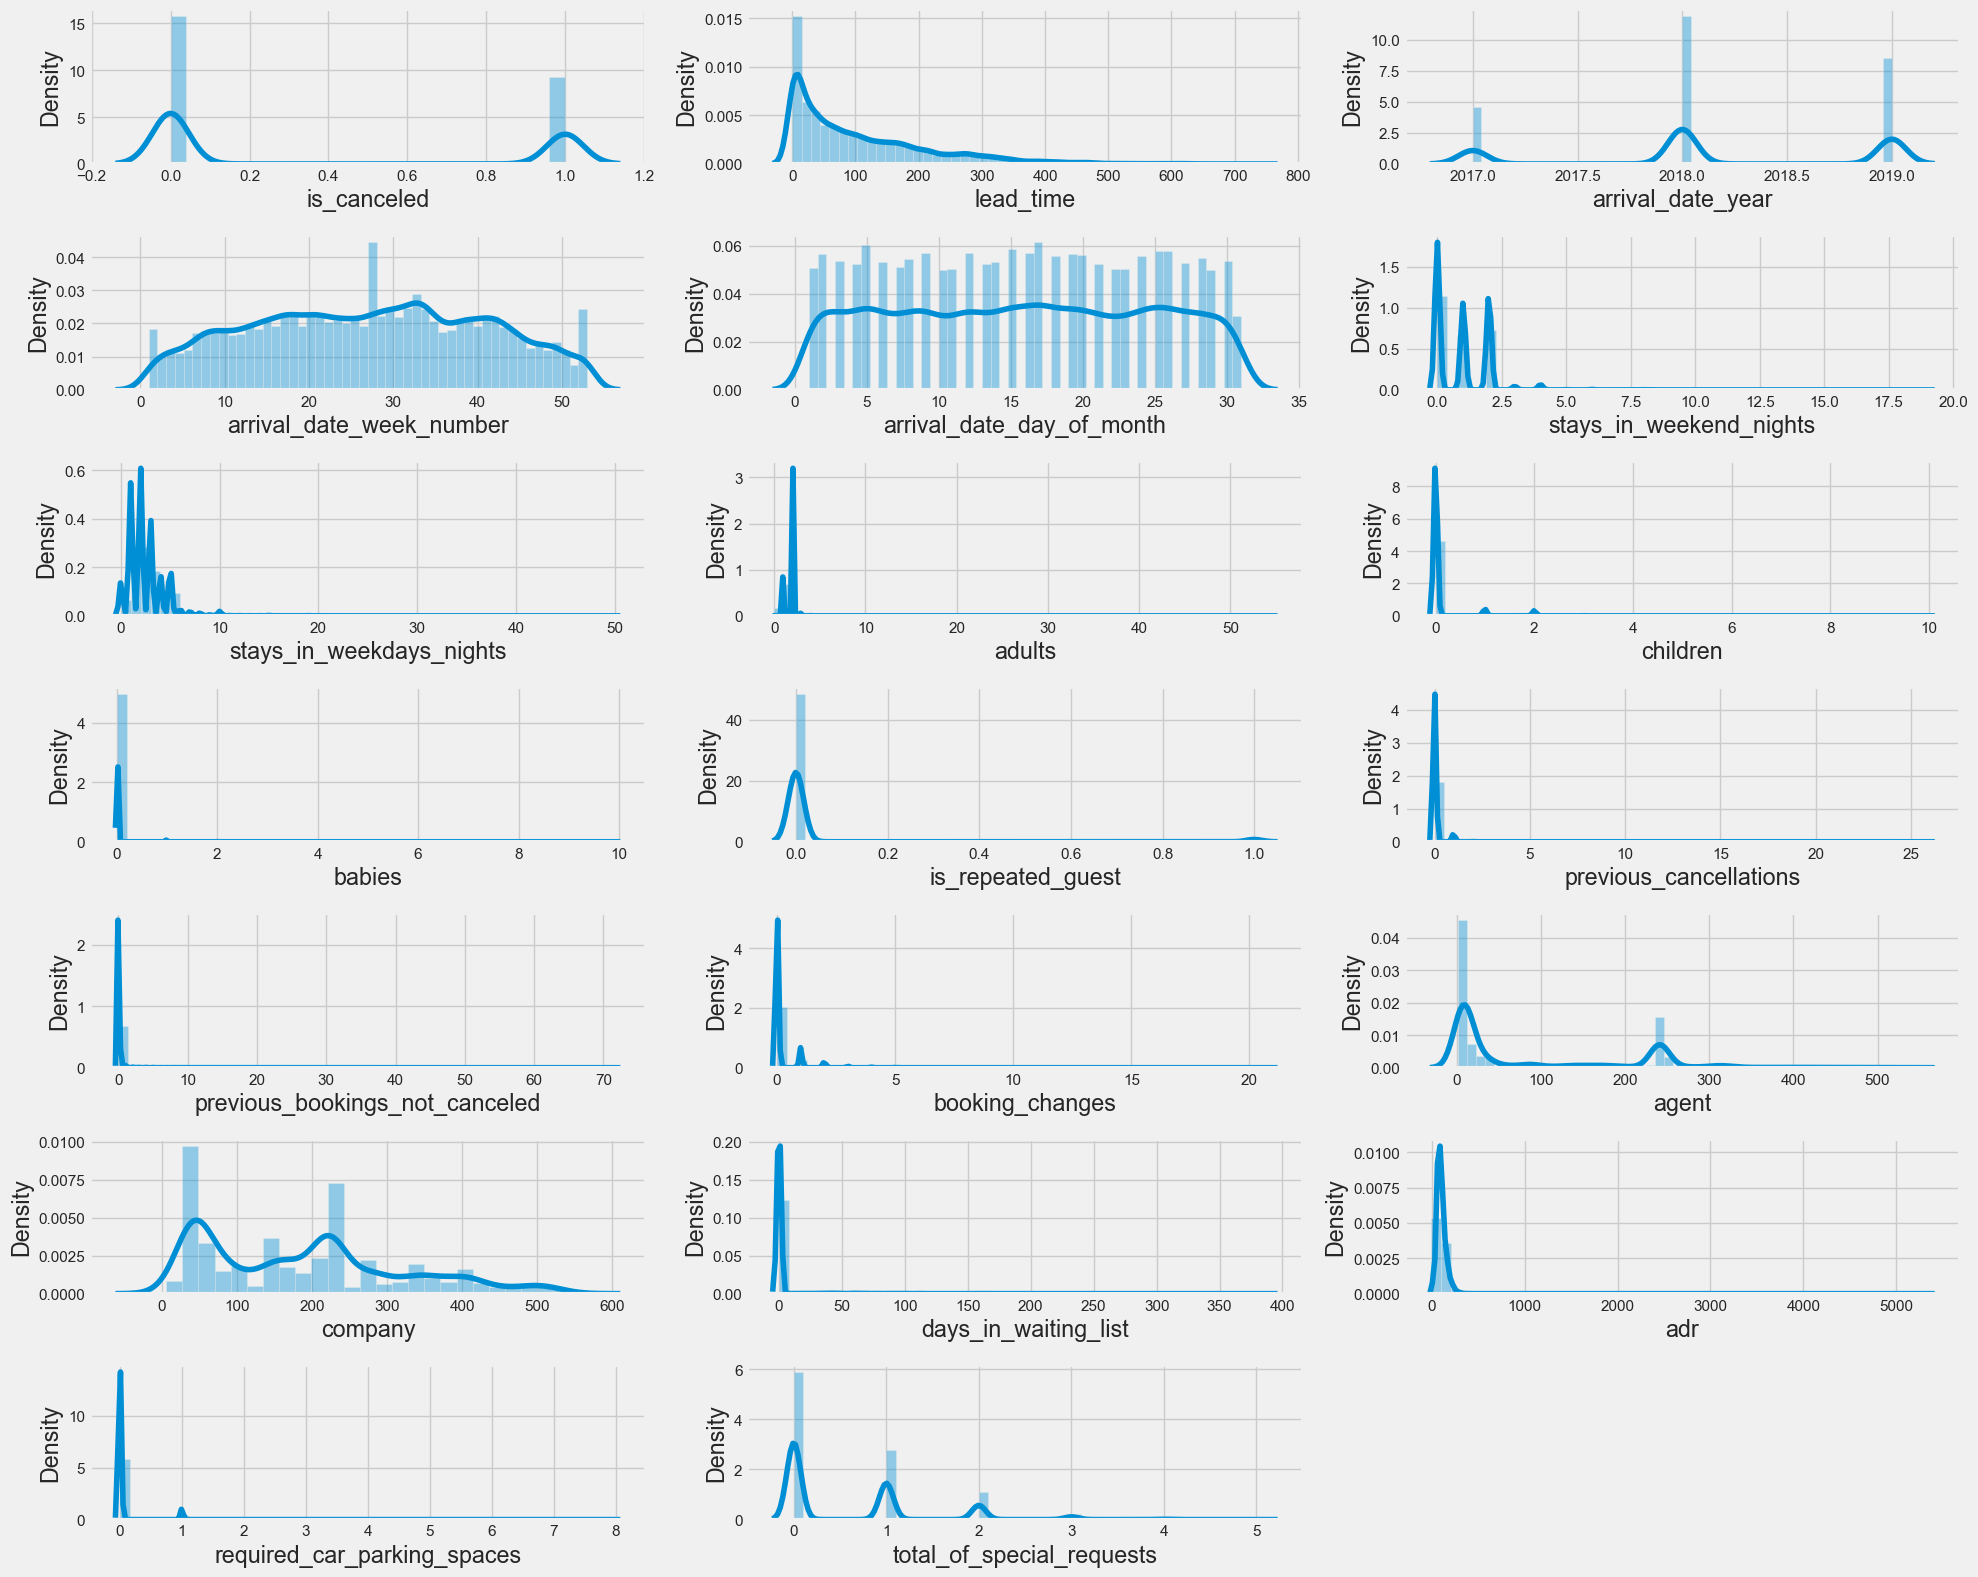

In [10]:
plt.subplots(figsize=(20, 16))

for i, column in enumerate(nums.columns, 1):
    plt.subplot(7, 3, i)
    sns.distplot(nums[column])
    plt.tight_layout()

Although most columns in the dataset exhibit a right-skewed distribution, the overall data appears to be reasonably well-behaved. Nevertheless, a detailed statistical analysis reveals that the `baby` column contains an immense maximum value, so further investigation needs to be carried out. During multivariate analysis

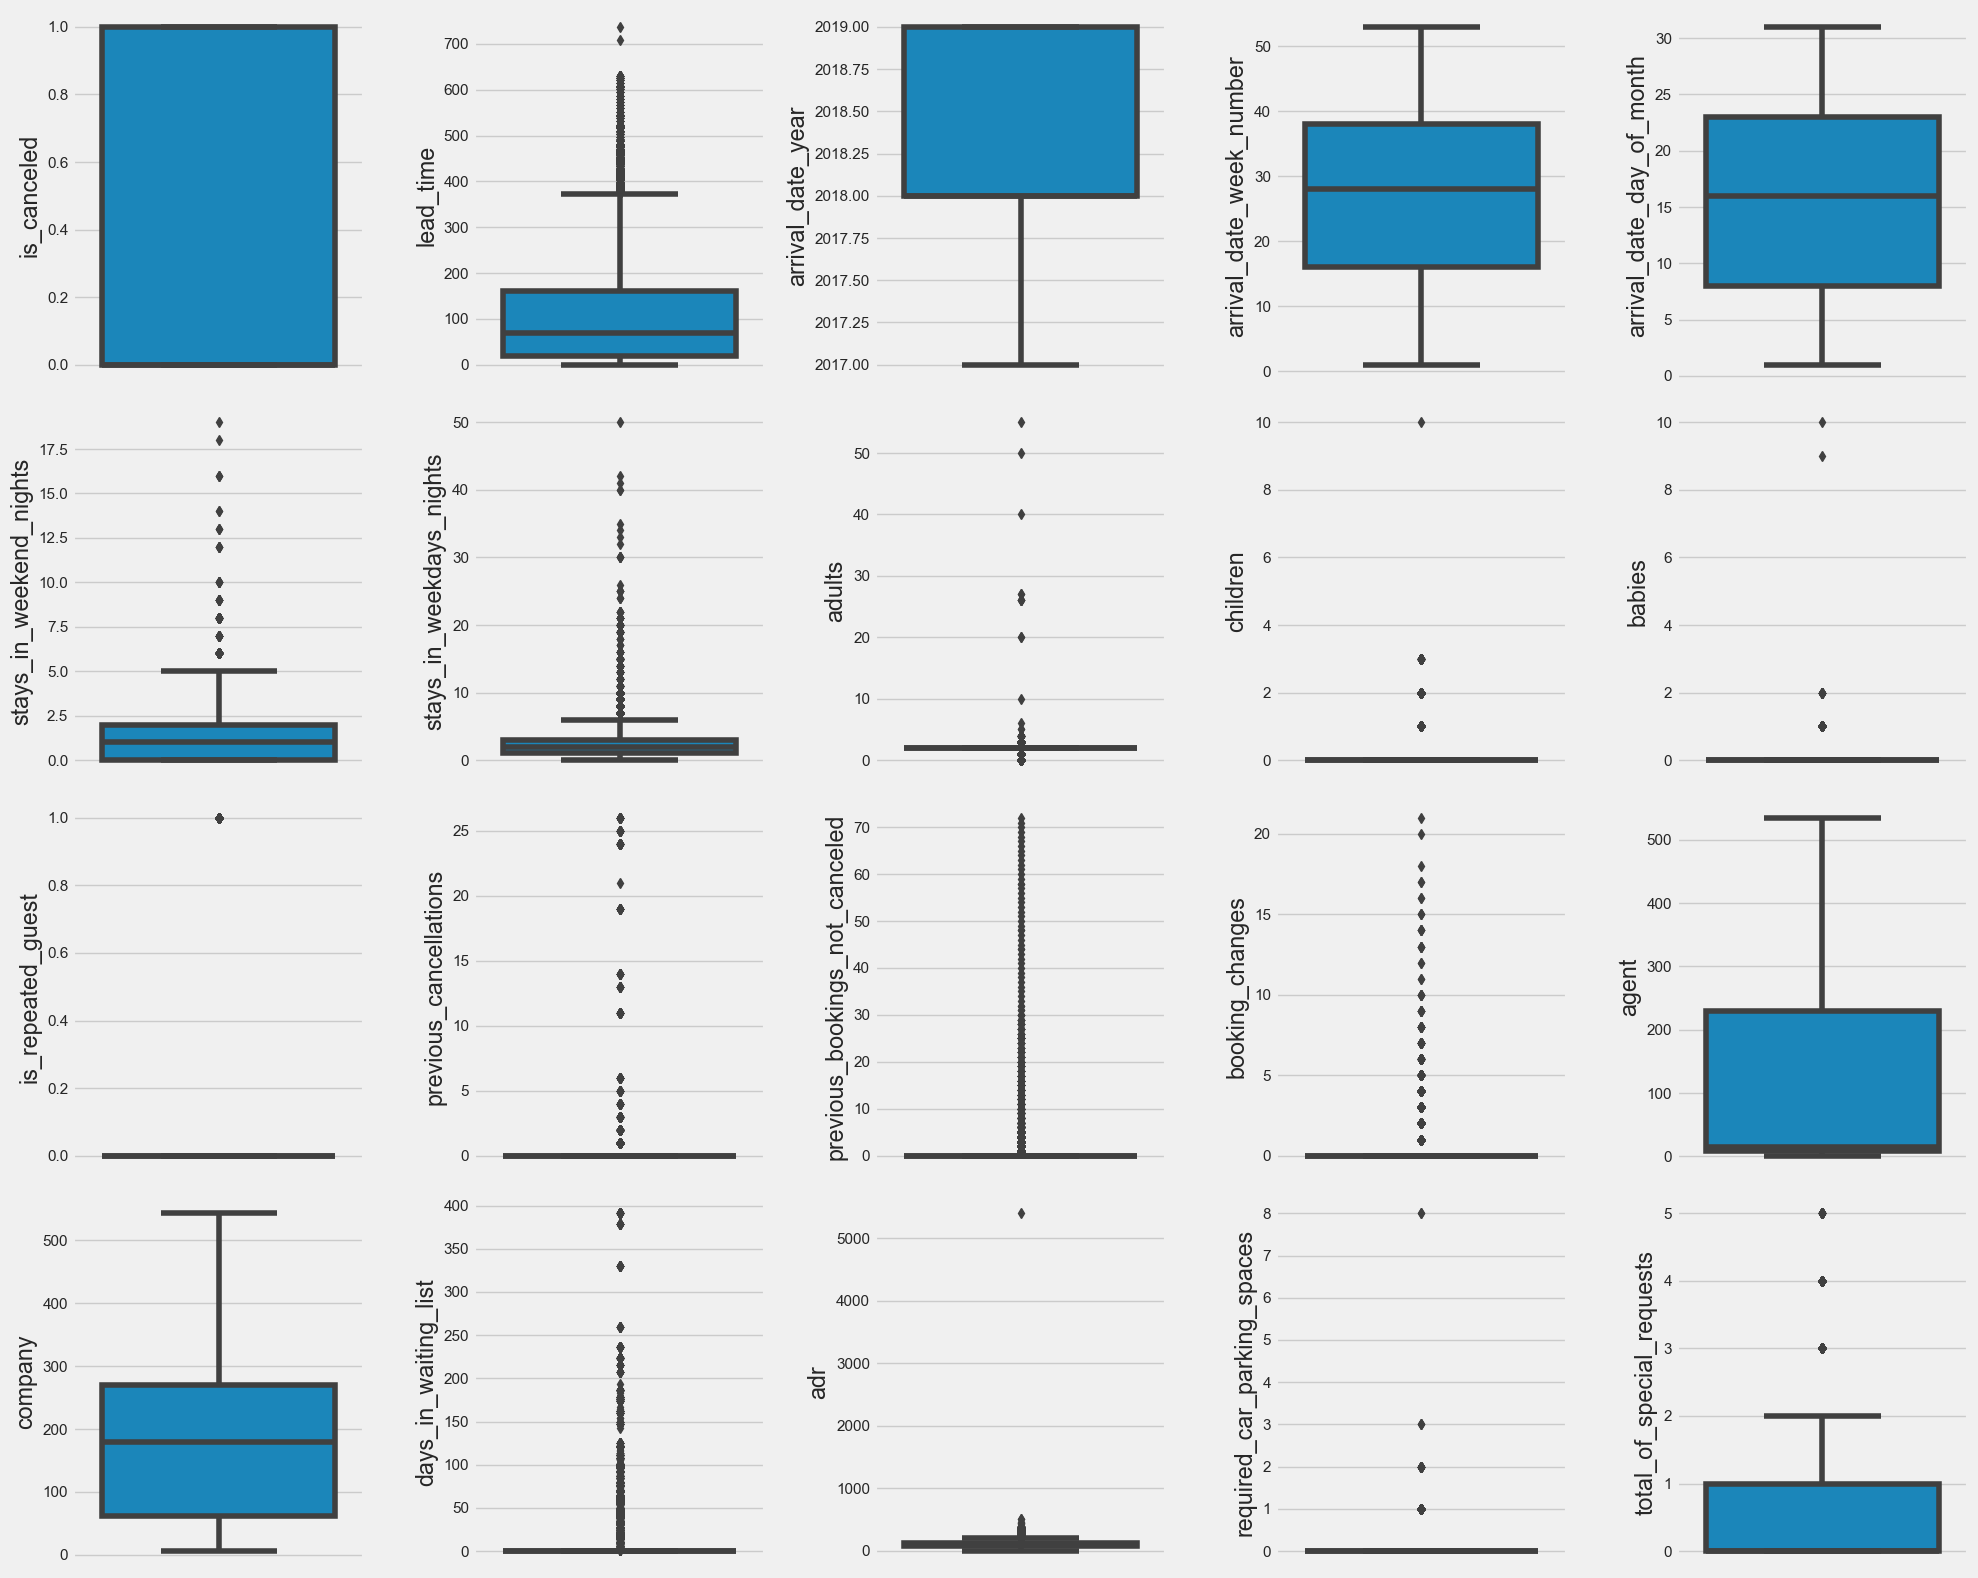

In [11]:
plt.subplots(figsize=(20, 16))

for i, column in enumerate(nums.columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(y=nums[column])
    plt.tight_layout()

### Checking Unique Value from Categorical Columns

Displaying unique values in categorical columns is essential for assessing the data distribution in each column and identifying potential typographical errors. Since the number of unique values in each column is relatively small, manual inspection can be effectively performed to ensure data accuracy.

In [12]:
# Unique Value in hotel Column
cats.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [13]:
# Unique Value in meal Column
cats.meal.value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

In [14]:
# Unique Value in city Column
print(cats.city.sort_values().unique())

['Kabupaten Aceh Jaya' 'Kabupaten Bandung' 'Kabupaten Bandung Barat'
 'Kabupaten Bangka' 'Kabupaten Bangkalan' 'Kabupaten Banjar'
 'Kabupaten Banjarnegara' 'Kabupaten Bantul' 'Kabupaten Banyumas'
 'Kabupaten Banyuwangi' 'Kabupaten Barito Kuala' 'Kabupaten Batang'
 'Kabupaten Bekasi' 'Kabupaten Belitung' 'Kabupaten Berau'
 'Kabupaten Blitar' 'Kabupaten Blora' 'Kabupaten Bogor'
 'Kabupaten Bojonegoro' 'Kabupaten Bondowoso' 'Kabupaten Boyolali'
 'Kabupaten Brebes' 'Kabupaten Ciamis' 'Kabupaten Cianjur'
 'Kabupaten Cilacap' 'Kabupaten Cirebon' 'Kabupaten Demak'
 'Kabupaten Flores Timur' 'Kabupaten Garut' 'Kabupaten Gresik'
 'Kabupaten Grobogan' 'Kabupaten Gunung Kidul'
 'Kabupaten Halmahera Selatan' 'Kabupaten Indramayu' 'Kabupaten Jember'
 'Kabupaten Jepara' 'Kabupaten Jombang' 'Kabupaten Kapuas'
 'Kabupaten Kapuas Hulu' 'Kabupaten Karanganyar' 'Kabupaten Karawang'
 'Kabupaten Katingan' 'Kabupaten Kebumen' 'Kabupaten Kediri'
 'Kabupaten Kendal' 'Kabupaten Kepulauan Aru' 'Kabupaten Kepulau

In [15]:
# Unique Value in market_segment Column
cats.market_segment.value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [16]:
# Unique Value in distribution_channel Column
cats.distribution_channel.value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [17]:
# Unique Value in deposit_type Column
cats.deposit_type.value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [18]:
# Unique Value in customer_type Column
cats.customer_type.value_counts()

Personal     89613
Family       25124
Contract      4076
Bussiness      577
Name: customer_type, dtype: int64

In [19]:
# Unique Value in reservation_status Column
cats.reservation_status.value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

It was found that some columns had 'Undefined' values. Due to its uncertain value, data with an 'Undefined' value will be treated as a Null Value, because the number of rows with an 'Undefined' value other than the `meal` column is relatively small. Then, these rows will be deleted, while the 'Undefined' value in the `meal` column will be replaced with the mode value.

## Multivariate Analysis

### Customer Check

Checks are carried out based on the number of guests to detect the possibility of bookings without guests or adults.

In [20]:
dfhotel['total_guests'] = (dfhotel['adults'] + dfhotel['children'] + dfhotel['babies'])
dfhotel.sort_values('total_guests', ascending=True).head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests
64782,City Hotel,1,0,2019,May,11,16,0,3,0,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Canceled,0.0
32827,Resort Hotel,0,46,2019,March,4,25,3,9,0,0.0,0,No Meal,Kota Yogyakarta,Direct,Direct,0,0,0,8,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out,0.0
94821,City Hotel,0,1,2018,October,32,3,2,5,0,0.0,0,No Meal,Kota Yogyakarta,Online TA,TA/TO,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out,0.0
111710,City Hotel,0,6,2019,July,20,14,0,0,0,0.0,0,Breakfast,Kota Denpasar,Groups,Corporate,0,0,0,1,No Deposit,NaN,169.0,0,Family,0.0,0,0,Check-Out,0.0
111709,City Hotel,0,31,2019,July,20,14,0,0,0,0.0,0,Breakfast,Kota Denpasar,Groups,Corporate,0,0,0,2,No Deposit,459.0,NaN,0,Family,0.0,0,0,Check-Out,0.0


In [21]:
dfhotel[(dfhotel['adults'] == 0) & (dfhotel['babies'] != 0)].head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests
46150,City Hotel,0,6,2017,February,51,18,0,1,0,2.0,1,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Family,77.00,0,2,Check-Out,3.0
81375,City Hotel,1,22,2017,February,50,9,1,4,0,2.0,1,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,1,No Deposit,14.0,NaN,0,Personal,80.75,0,1,No-Show,3.0
90790,City Hotel,0,14,2018,August,24,9,0,3,0,2.0,1,Breakfast,Kabupaten Kepulauan Seribu,Online TA,TA/TO,0,0,0,2,No Deposit,9.0,NaN,0,Personal,116.49,0,2,Check-Out,3.0


Some rows didn't have a single guest, and some rows only had children and babies as guests. For someone who is still a minor, booking a hotel room without being accompanied by an adult is considered impossible. So, the row will be deleted.

Next, a check was also carried out on the `baby` column, which was compared with the `adult` column because it showed a row with a relatively large number of babies. Therefore, it is necessary to analyze by comparing it with the `adult` column to assess whether the row makes sense.

In [22]:
dfhotel.sort_values('babies', ascending = False).head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests
46619,City Hotel,0,37,2018,March,3,12,0,2,2,0.0,10,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,1,No Deposit,9.0,NaN,0,Personal,84.45,0,1,Check-Out,12.0
78656,City Hotel,0,11,2017,December,42,11,2,1,1,0.0,9,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,1,No Deposit,95.0,NaN,0,Family,95.00,0,0,Check-Out,10.0
94063,City Hotel,0,4,2018,September,31,27,0,4,2,0.0,2,Breakfast,Kota Jakarta Pusat,Online TA,TA/TO,0,0,0,2,No Deposit,9.0,NaN,0,Personal,176.00,0,2,Check-Out,4.0


It can be seen that there is a row with 10 babies while there are only 2 adults. This can be said to be almost impossible to happen so that the row would be deleted.

### Time

#### Day of Month

In [23]:
month_list = dfhotel.groupby('arrival_date_month', as_index=False).agg({'arrival_date_day_of_month':('min','max')})

# Sorting by month
custom_dict = {'January':0, 'February':1, 'March':2, 'April':3, 'May':4, 'June':5, 'July':6, 'August':7, 'September':8, 'October':9, 'November':10, 'December':11}
month_list['arrival_date_month'] = pd.Categorical(month_list['arrival_date_month'], categories=custom_dict, ordered=True)
month_list = month_list.sort_values('arrival_date_month').reset_index(drop='index')
month_list

arrival_date_month arrival_date_day_of_month    
                                            min max
0             January                         1  30
1            February                         1  31
2               March                         1  31
3               April                         1  29
4                 May                         1  31
5                June                         1  30
6                July                         1  31
7              August                         1  30
8           September                         1  31
9             October                         1  31
10           November                         1  30
11           December                         1  31

In February, it appears that dates exceed 28. This is very unlikely, especially in the data without leap years. Dates above 28 February will be deleted. Likewise, in September, which should only have 30 days, then those that are inappropriate will be deleted.

#### Date Week Number

In [24]:
month_list = dfhotel.groupby(['arrival_date_year', 'arrival_date_month'], as_index=False).agg({'arrival_date_week_number':('min','max')})

# Sorting by month
custom_dict = {'January':0, 'February':1, 'March':2, 'April':3, 'May':4, 'June':5, 'July':6, 'August':7, 'September':8, 'October':9, 'November':10, 'December':11}
month_list['arrival_date_month'] = pd.Categorical(month_list['arrival_date_month'], categories=custom_dict, ordered=True)
month_list = month_list.sort_values(['arrival_date_year', 'arrival_date_month']).reset_index(drop='index')
month_list

arrival_date_year arrival_date_month arrival_date_week_number    
                                                             min max
0               2017            January                       45  49
1               2017           February                       49  53
2               2017          September                       27  31
3               2017            October                       31  36
4               2017           November                       36  40
5               2017           December                       40  44
6               2018            January                       45  49
7               2018           February                       49  53
8               2018              March                        1   6
9               2018              April                        6  10
10              2018                May                       10  14
11              2018               June                       14  18
12              2018               July                       19  23
13              2018             August                       23  27
14              2018          September                       27  32
15              2018            October                       32  36
16              2018           November                       36  40
17              2018           December                       40  45
18              2019              March                        1   5
19              2019              April                        5   9
20              2019                May                        9  13
21              2019               June                       13  18
22              2019               July                       18  22
23              2019             August                       22  26
24              2019          September                       26  31
25              2019            October                       31  35

It can also be seen that the `arrival_date_week_number` calculation may start at the beginning of March when the count should begin at the beginning of January. Therefore, adjustments will be made to the `arrival_date_week_number` column.

#### Stay Duration

At this stage, a new column called `stay_duration` will be created, which is the sum of the `stays_in_weekend_nights` and `stays_in_weekdays_nights` columns.

In [25]:
dfhotel['stay_duration'] = dfhotel['stays_in_weekend_nights'] + dfhotel['stays_in_weekdays_nights'] 
a = dfhotel[dfhotel['stay_duration'] == 0].stay_duration.count()
print(f'The number of rows with a value of stay duration = 0 is {a}.') 

The number of rows with a value of stay duration = 0 is 715.


Several rows are found with a value of stay duration = 0, then these rows will be deleted.

<br>
<br>
<hr style="border:2px solid black">
<hr style="border:6px solid black">
<br>

# DATA CLEANSING
<hr style="border:1px solid black">

Before starting the search for insights, it is necessary to clean the dataset so that the data is more accurate, making searching for insights easier. Some of the actions taken in the Data Cleansing process this time include:
- Duplicate Checking
- Null Values Handling
- Data Correction
- Data Type Conversion

## Duplicate Checking

A check is carried out to see whether there are duplicate rows. If duplicate rows are found, action will be taken which is deemed most appropriate to the condition of the existing data.

In [26]:
dfhotel[dfhotel.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out,2.0,2
22,Resort Hotel,0,72,2017,September,27,1,2,4,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,1,No Deposit,250.0,NaN,0,Personal,84.67,0,1,Check-Out,2.0,6
43,Resort Hotel,0,70,2017,September,27,2,2,3,2,0.0,0,Dinner,Kabupaten Tangerang,Direct,Direct,0,0,0,0,No Deposit,250.0,NaN,0,Personal,137.00,0,1,Check-Out,2.0,5
138,Resort Hotel,1,5,2017,September,28,5,1,0,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,97.00,0,0,Canceled,2.0,1
200,Resort Hotel,0,0,2017,September,28,7,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,109.80,0,3,Check-Out,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2019,October,35,31,0,3,2,0.0,0,Breakfast,Kabupaten Bandung,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,126.00,0,2,Check-Out,2.0,3
119352,City Hotel,0,63,2019,October,35,31,0,3,3,0.0,0,Breakfast,Kota Surabaya,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Family,195.33,0,2,Check-Out,3.0,3
119353,City Hotel,0,63,2019,October,35,31,0,3,3,0.0,0,Breakfast,Kota Surabaya,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Family,195.33,0,2,Check-Out,3.0,3
119354,City Hotel,0,63,2019,October,35,31,0,3,3,0.0,0,Breakfast,Kota Surabaya,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Family,195.33,0,2,Check-Out,3.0,3


After a meticulous examination of duplicates, numerous redundant rows were pinpointed. The absence of unit identification in each row posed challenges in validating data accuracy. In the end, it was decided to keep one entry from each set of duplicates, considering that it was almost impossible for a customer to make an order that was completely identical from the date the order was made to the date of stay, along with other details.

In [27]:
# Duplicate Removal
dfhotel = dfhotel.drop_duplicates(keep='first')

## Null Values Handling

Each column undergoes thorough Null value checking to assess the presence of any Null values. If a Null value is identified in a column where it is contextually valid, the corresponding rows will be retained. However, if a Null value is detected in a column where it is not appropriate, the row will either be deleted, or the Null value will be substituted with the most suitable alternative.

In [28]:
# Percentage of Null
dfhotel.isnull().sum() / dfhotel.shape[0] * 100.00

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_weekdays_nights           0.000000
adults                             0.000000
children                           0.004644
babies                             0.000000
meal                               0.000000
city                               0.522472
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                             13.864088
company                         

Based on checking the Null Values above, several columns have Null values. Columns with a relatively small number of Null values, such as the `children` and `city` columns, will have their rows deleted, while the `agent` and `company` columns, which have a relatively high percentage of Null values, will be seen first to see whether the whole row makes sense to be Null or not.

### Delete Null

#### Children and City Column

Since the number of Null values is small, rows with null values in the `child` and `city` columns will be deleted.

In [29]:
dfhotel = dfhotel[(dfhotel['children'].notna())]
dfhotel = dfhotel[(dfhotel['city'].notna())]

#### Agent

Because not all hotel guests book rooms through agents, it is possible that there is a Null value in the `agent` column. Still, it is also necessary to check other columns containing information about bookings made through agents.

In [30]:
dfhotel = dfhotel.reset_index()

In [31]:
dfhotel[dfhotel['agent'].isna()].distribution_channel.value_counts()

Direct       6371
Corporate    4108
TA/TO        1132
GDS             2
Undefined       1
Name: distribution_channel, dtype: int64

In the `distribution_channel` column, several values were found, such as 'TA/TO' and 'GDS', which were indicated to be related to orders through agents, and there was also the value 'Undefined'. Because there are not many of them, these lines will be deleted.

In [32]:
filter_data = dfhotel[((dfhotel['agent'].isna()) & (dfhotel['distribution_channel'] == 'TA/TO')) | 
                       ((dfhotel['agent'].isna()) & (dfhotel['distribution_channel'] == 'Undefined')) |
                       ((dfhotel['agent'].isna()) & (dfhotel['distribution_channel'] == 'GDS'))]

In [33]:
dfhotel = dfhotel[~dfhotel['index'].isin(filter_data['index'])]

In [34]:
dfhotel[dfhotel['agent'].isna()].distribution_channel.value_counts()

Direct       6371
Corporate    4108
Name: distribution_channel, dtype: int64

#### Company

Similar to the `agent` column, the `company` column may also have a Null value, but checking to avoid rows that cannot have a Null value is still necessary.

In [35]:
dfhotel[dfhotel['company'].isna()].distribution_channel.value_counts()

TA/TO        66844
Direct       12042
Corporate      932
GDS            175
Name: distribution_channel, dtype: int64

In [36]:
filter_data = dfhotel[((dfhotel['company'].isna()) & (dfhotel['distribution_channel'] == 'Corporate'))]

In [37]:
dfhotel = dfhotel[~dfhotel['index'].isin(filter_data['index'])]

In [38]:
dfhotel[dfhotel['company'].isna()].distribution_channel.value_counts()

TA/TO     66844
Direct    12042
GDS         175
Name: distribution_channel, dtype: int64

## Data Correction

At this stage, values that were found to have incorrect values in the previous analysis will be corrected or deleted.

### Incorrect Day of Month

**Removing Inaccurate Dates**

In [39]:
dfhotel['date'] = dfhotel['arrival_date_day_of_month'].astype(str) + '-' +  dfhotel['arrival_date_month'] + '-' + dfhotel['arrival_date_year'].astype(str)

In [40]:
dfhotel= dfhotel[(~dfhotel['date'].str.contains('29-February')) & 
                 (~dfhotel['date'].str.contains('30-February')) & 
                 (~dfhotel['date'].str.contains('31-February')) & 
                 (~dfhotel['date'].str.contains('31-September'))]

### Incorrect Week Number

In [41]:
# Change Format into datetime
#dfhotel['date'] = pd.to_datetime(dfhotel['date']).dt.date
dfhotel['date'] = pd.to_datetime(dfhotel['date'], format = '%d-%B-%Y', errors='coerce')
dfhotel['date']

0       2017-09-01
1       2017-09-01
2       2017-09-01
4       2017-09-01
5       2017-09-01
           ...    
85670   2019-10-30
85671   2019-10-31
85672   2019-10-31
85673   2019-10-31
85674   2019-10-29
Name: date, Length: 82579, dtype: datetime64[ns]

In [42]:
dfhotel['arrival_date_week_number'] = (dfhotel.date.dt.strftime('%V')).astype(int)

In [43]:
month_list = dfhotel.groupby(['arrival_date_year', 'arrival_date_month'], as_index=False).agg({'arrival_date_week_number':('min','max')})

# Sorting by month
custom_dict = {'January':0, 'February':1, 'March':2, 'April':3, 'May':4, 'June':5, 'July':6, 'August':7, 'September':8, 'October':9, 'November':10, 'December':11}
month_list['arrival_date_month'] = pd.Categorical(month_list['arrival_date_month'], categories=custom_dict, ordered=True)
month_list = month_list.sort_values(['arrival_date_year', 'arrival_date_month']).reset_index(drop='index')
month_list

arrival_date_year arrival_date_month arrival_date_week_number    
                                                             min max
0               2017            January                        1  52
1               2017           February                        5   9
2               2017          September                       35  39
3               2017            October                       39  44
4               2017           November                       44  48
5               2017           December                       48  52
6               2018            January                        1   5
7               2018           February                        5   9
8               2018              March                        9  13
9               2018              April                       13  17
10              2018                May                       18  22
11              2018               June                       22  26
12              2018               July                       26  31
13              2018             August                       31  35
14              2018          September                       35  39
15              2018            October                       40  44
16              2018           November                       44  48
17              2018           December                        1  52
18              2019              March                        9  13
19              2019              April                       14  17
20              2019                May                       18  22
21              2019               June                       22  26
22              2019               July                       27  31
23              2019             August                       31  35
24              2019          September                       35  40
25              2019            October                       40  44

There are still irregularities in January 2017, which has a max value of 52, and in December 2018, which has a minimum value of 1. Therefore, further handling will be carried out using a custom function.

In [44]:
def correct_week(x):
    if (x.arrival_date_year == 2017) :
        if (x.arrival_date_month == 'January') and (x.arrival_date_week_number == 52):
            return 1
        else:
            return (x.arrival_date_week_number + 1)
    elif (x.arrival_date_year == 2018) and (x.arrival_date_month == 'December') and (x.arrival_date_week_number == 1):
        return 53
    else:
        return x.arrival_date_week_number
    
dfhotel['arrival_date_week_number'] = dfhotel.apply(lambda x: correct_week(x), axis=1)

In [45]:
month_list = dfhotel.groupby(['arrival_date_year', 'arrival_date_month'], as_index=False).agg({'arrival_date_week_number':('min','max')})

# Sorting by month
custom_dict = {'January':0, 'February':1, 'March':2, 'April':3, 'May':4, 'June':5, 'July':6, 'August':7, 'September':8, 'October':9, 'November':10, 'December':11}
month_list['arrival_date_month'] = pd.Categorical(month_list['arrival_date_month'], categories=custom_dict, ordered=True)
month_list = month_list.sort_values(['arrival_date_year', 'arrival_date_month']).reset_index(drop='index')
month_list

arrival_date_year arrival_date_month arrival_date_week_number    
                                                             min max
0               2017            January                        1   6
1               2017           February                        6  10
2               2017          September                       36  40
3               2017            October                       40  45
4               2017           November                       45  49
5               2017           December                       49  53
6               2018            January                        1   5
7               2018           February                        5   9
8               2018              March                        9  13
9               2018              April                       13  17
10              2018                May                       18  22
11              2018               June                       22  26
12              2018               July                       26  31
13              2018             August                       31  35
14              2018          September                       35  39
15              2018            October                       40  44
16              2018           November                       44  48
17              2018           December                       48  53
18              2019              March                        9  13
19              2019              April                       14  17
20              2019                May                       18  22
21              2019               June                       22  26
22              2019               July                       27  31
23              2019             August                       31  35
24              2019          September                       35  40
25              2019            October                       40  44

### adr values

At the data exploration stage, information is obtained that in the `adr` column, there are values zero and below zero (-), then these rows will be deleted except for rows that have the value 'Complementary' in the `market_segment` column because it is still considered normal if the value `adr` = 0

In [46]:
# Checking total rows that would be deleted
tot_val = dfhotel[~((dfhotel['adr'] > 0) | ((dfhotel['market_segment'] == 'Complementary') & (dfhotel['adr'] == 0)))].adr.count()
print(f'Number of rows to be deleted: {tot_val} rows')

Number of rows to be deleted: 1051 rows


In [47]:
# Deleting unwanted Rows
dfhotel = dfhotel[(dfhotel['adr'] > 0) | ((dfhotel['market_segment'] == 'Complementary') & (dfhotel['adr'] == 0))]

### Stay Duration

Stay duration = 0 would be deleted

In [48]:
dfhotel = dfhotel[~(dfhotel['stay_duration'] == 0)]

### Undefined Value

#### meal Column

As mentioned during data exploration, the 'Undefined' value in the `meal` column will be replaced with the mode value by considering several columns such as 'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'adr_cat' (new column created in the process of determining the mode).

In [49]:
# Categorize `adr` values with a range of 5.0 in each category.
dfhotel['adr_cat'] = np.ceil(dfhotel['adr']/5)

In [50]:
# Convert 'undefinied value into NA
dfhotel['meal'] = dfhotel['meal'].replace('Undefined', np.nan)

In [51]:
# Change NA Values with the Mode Values
## Grouping
groups = dfhotel.groupby(['stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'adr_cat'])

## where all the rows within a group is NaN
all_na = groups['meal'].transform(lambda x: x.isna().all())

## fill global mode
dfhotel.loc[all_na, 'meal'] = dfhotel['meal'].mode()[0]

## fill with local mode
mode_by_group = groups['meal'].transform(lambda x: x.mode()[0])
dfhotel['meal'] = dfhotel['meal'].fillna(mode_by_group)

In [52]:
# Checking whether there are still 'Undefined' Values or not
dfhotel.meal.value_counts()

Breakfast     63604
No Meal        9142
Dinner         8445
Full Board      325
Name: meal, dtype: int64

#### market_segment and distribution_channel Column

For the `market_segment` and `distribution_channel` columns, rows with the 'Undefined'  values will be deleted.

In [53]:
dfhotel = dfhotel[~((dfhotel['market_segment']=='Undefined') | (dfhotel['distribution_channel']=='Undefined'))]

### Unnecessary Rows

Rows without customers (Adults=0, children=0, babies=0)

In [54]:
dfhotel = dfhotel[~((dfhotel['adults'] == 0) & 
                    (dfhotel['children'] == 0) & 
                    (dfhotel['babies'] == 0))]

Rows without Adult customers (Adults=0, children >= 1, babies >= 0) and  customer type = Personal

In [55]:
dfhotel = dfhotel[~((dfhotel['adults'] == 0) & 
                    (dfhotel['children'] >= 1) & 
                    (dfhotel['babies'] >= 0)  & 
                    (dfhotel['customer_type'] == 'Personal'))]

Rows with too many babies but accompanied by relatively few adults

In [56]:
dfhotel = dfhotel[~((dfhotel['babies'] >= 10))]

## Data Type

Columns containing data types considered unsuitable will be adjusted accordingly.

In [57]:
dfhotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81347 entries, 2 to 85674
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           81347 non-null  int64         
 1   hotel                           81347 non-null  object        
 2   is_canceled                     81347 non-null  int64         
 3   lead_time                       81347 non-null  int64         
 4   arrival_date_year               81347 non-null  int64         
 5   arrival_date_month              81347 non-null  object        
 6   arrival_date_week_number        81347 non-null  int64         
 7   arrival_date_day_of_month       81347 non-null  int64         
 8   stays_in_weekend_nights         81347 non-null  int64         
 9   stays_in_weekdays_nights        81347 non-null  int64         
 10  adults                          81347 non-null  int64         
 11  ch

In [58]:
dfhotel['children'] = dfhotel['children'].astype(int)
dfhotel['total_guests'] = dfhotel['total_guests'].astype(int)
dfhotel['adr_cat'] = dfhotel['adr_cat'].astype(int)

In [59]:
dfclean = dfhotel

<br>
<br>
<hr style="border:2px solid black">
<hr style="border:6px solid black">
<br>

# INSIGHT
<hr style="border:1px solid black">

Once the data is deemed clean enough, the next step is to search for insights with a focus on finding out how customers behave in making hotel reservations and its relationship to the rate of cancellation of hotel reservations.

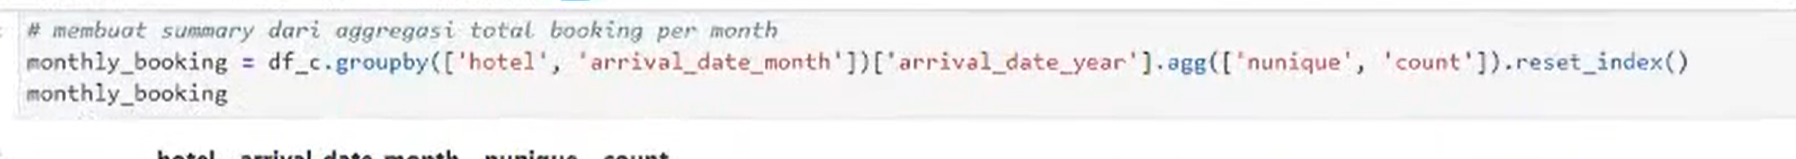

In [60]:
dfhotel.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()

,hotel,arrival_date_month,nunique,count
0,City Hotel,April,2,3409
1,City Hotel,August,2,4768
2,City Hotel,December,2,3922
3,City Hotel,February,2,2445
4,City Hotel,January,2,2772
5,City Hotel,July,2,5181
6,City Hotel,June,2,4903
7,City Hotel,March,2,2546
8,City Hotel,May,2,4654
9,City Hotel,November,2,3913


## A. Total Transaction

In [61]:
df_avg = dfhotel.groupby('hotel', as_index=False).index.count().rename({'index' : 'total_transaction'}, axis=1)
df_avg['percent'] = round(((df_avg['total_transaction'] / len(dfhotel)) * 100), 0)
df_avg

,hotel,total_transaction,percent
0,City Hotel,50273,62.0
1,Resort Hotel,31074,38.0


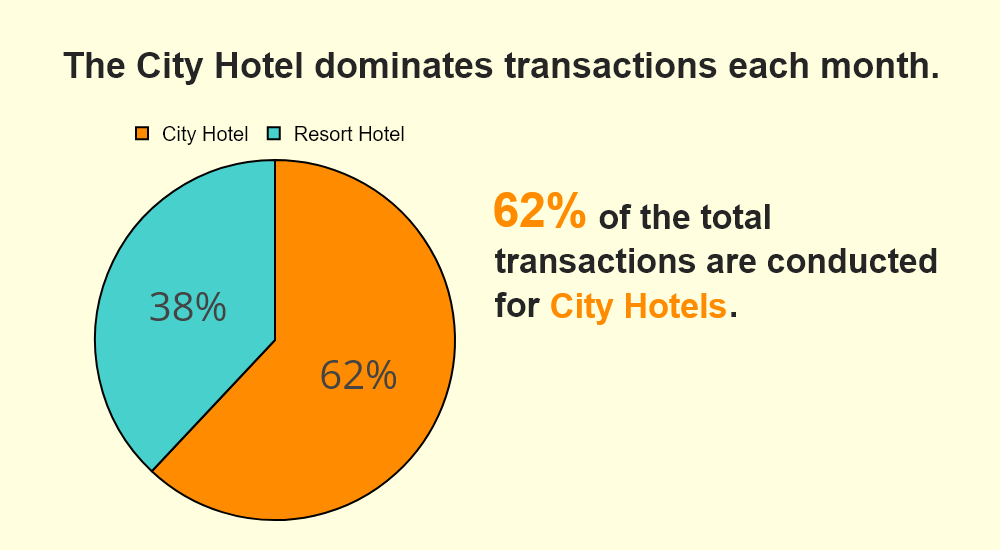

In [62]:
# Set Color
colors = ['darkorange', 'mediumturquoise', 'gold', 'lightgreen']

fig = go.Figure()

fig.add_trace(
    go.Pie(labels=df_avg['hotel'],
    values=df_avg['percent']))

fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=40,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

# ------------------------------------------------------------------------------------------------------------------------
# Adding Annotation Parameters

annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.2,
                              xanchor='left', yanchor='bottom',
                              text='<br><b> The City Hotel dominates transactions each month. <b>',
                              font=dict(family='Arial',
                                        size=36,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

annotations.append(dict(xref='paper', yref='paper', x=2, y=0.9,
                              align='left',
                              text='\
                              <b>           of the total <br>\
                              transactions are conducted <br>\
                              for                    . <b>',
                              font=dict(family='Arial',
                                        size=34,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

annotations.append(dict(xref='paper', yref='paper', x=1.23, y=0.94,
                              align='left',
                              text='\
                              <b> 62% <b>',
                              font=dict(family='Arial',
                                        size=48,
                                        color='darkorange'),
                              showarrow=False))

annotations.append(dict(xref='paper', yref='paper', x=1.53, y=0.595,
                              align='left',
                              text='\
                              <b> City Hotels <b>',
                              font=dict(family='Arial',
                                        size=34,
                                        color='darkorange'),
                              showarrow=False))

# ----------------------------------------------------------------------------------------------------------
# Set theme, margin, and apply annotation in layout
fig.update_layout(
    paper_bgcolor="LightYellow",
    width=1000,
    height=550,
    margin=dict(r=500, t=160, b=30, l=50),
    annotations=annotations,
    legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=0.8)
)

# Set Legend
fig.update_layout(legend = dict(font = dict(family = "Arial", size = 20, color = "black")),
                  legend_title = dict(font = dict(family = "Arial", size = 24, color = "black")))

fig.show('png')

The pie chart indicates a substantial predominance of city hotels in the overall recorded transactions within the dataset. Subsequently, a detailed analysis will be carried out to categorize the transactions on a monthly basis from January 2017 to October 2019.

In [63]:
# Creating new DataFrame
transaction = dfhotel.groupby(['arrival_date_year', 'arrival_date_month', 'hotel'], as_index=False).index.count().rename({'arrival_date_year':'year', 'arrival_date_month':'month', 'index':'total_transaction'}, axis=1)
transaction['month'] = pd.Categorical(transaction['month'], ordered=True, 
                              categories= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
#transaction = transaction.sort_values(by=['year','month'])
transaction = transaction.sort_values(by=['hotel','year','month'])


# Creating 'date' Column with mmm-YYYY format
transaction['date'] = (transaction['month'].str[0:3]) + '-' + (transaction['year'].astype(str))
transaction.head()

,year,month,hotel,total_transaction,date
4,2017,January,City Hotel,738,Jan-2017
2,2017,February,City Hotel,747,Feb-2017
10,2017,September,City Hotel,333,Sep-2017
8,2017,October,City Hotel,998,Oct-2017
6,2017,November,City Hotel,1458,Nov-2017


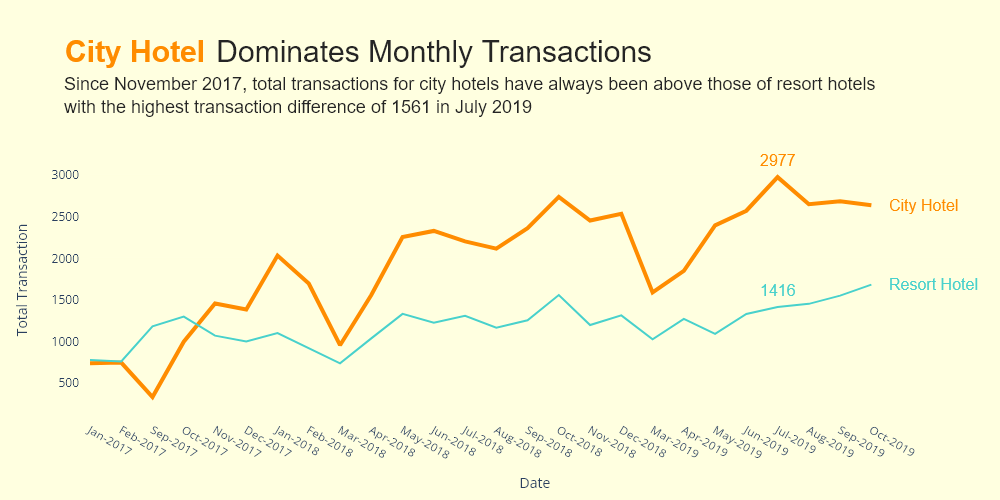

In [64]:
# Set Variable
colors = ['darkorange', 'mediumturquoise']
line = [4, 2]
highlight_01 = transaction[transaction.date == "Jul-2019"].reset_index()
highlight_02 = transaction[transaction.date == "Oct-2019"].reset_index()

# ----------------------------------------------------------------------------------------------------------------------
# Make Plot

fig = go.Figure()

for i in range(0,2):
    fig.add_trace(go.Scatter(
        x=transaction[transaction.hotel == transaction.hotel.unique()[i]].date,
        y=transaction[transaction.hotel == transaction.hotel.unique()[i]].total_transaction,
        name=(transaction.hotel.unique()[i]), line=dict(color=colors[i], width=line[i])
    ))
    

# ------------------------------------------------------------------------------------------------------------------------
# Adding Annotation Parameters

annotations = []

annotations.append(dict(xref='paper', yref='paper', x=-0.03, y=1.45,
                              align = "left",
                              text='<b>City Hotel<b>',
                              font=dict(family='Arial',
                                        size=30,
                                        color='darkorange'),
                              showarrow=False))

annotations.append(dict(xref='paper', yref='paper', x=0.13, y=1.45,
                              align = "left",
                              text=' Dominates Monthly Transactions',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

annotations.append(dict(xref='paper', yref='paper', x=-0.20, y=1.3,
                              align = "left",
                              text='\
                              Since November 2017, total transactions for city hotels have always been above those of resort hotels <br>\
                              with the highest transaction difference of 1561 in July 2019',
                              font=dict(family='Arial',
                                        size=18,
                                        color='rgb(37,37,37)'),
                              showarrow=False))


for i in range(0,2):
    annotations.append(dict(x=highlight_01.date[i], 
                            y=(highlight_01.total_transaction[i])+200,
                            text=highlight_01.total_transaction[i].astype(str),
                            font=dict(family='Arial',
                                      size=16,
                                      color=colors[i]),
                            showarrow=False))

    
for i in range(0,2):
    annotations.append(dict(x=25.5, 
                            y=(highlight_02.total_transaction[i]),
                            xanchor='left',
                            text=highlight_02.hotel[i],
                            font=dict(family='Arial',
                                      size=16,
                                      color=colors[i]),
                            showarrow=False))

# ------------------------------------------------------------------------------------------------------------------
# Updating Layout

fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=90,
        r=20,
        b=50,
        t=150,
        pad=10
    ),
    paper_bgcolor="LightYellow",
    plot_bgcolor="LightYellow",
    annotations=annotations,
    showlegend=False
)

# Set axis title
fig.update_xaxes(title_text="Date", gridcolor='LightYellow')
fig.update_yaxes(title_text="Total Transaction", gridcolor='LightYellow')

fig.show('png')

Upon further elaboration of the transaction history, it becomes increasingly evident that City Hotels dominate the transactions. It is observed that starting around November 2017, the number of transactions for City Hotels consistently surpasses those for Resort Hotels, with the largest difference recorded in July 2019, reaching approximately 1561 transactions.

Upon a more detailed examination of the transaction history, it becomes increasingly clear that City Hotels are predominant in transactions. From around November 2017 onward, the number of transactions for City Hotels consistently exceeds those for Resort Hotels, with the most significant difference recorded in July 2019, amounting to approximately 1561 transactions.

The graph also highlights a distinct pattern, consistently showing that March records the lowest transactions each year.

In [65]:
# Combining all transactions based on months without considering the year to find out the monthly average transaction.
transaction_month = dfhotel.groupby(['arrival_date_month', 'hotel'], as_index=False).arrival_date_year.agg(['nunique', 'count']).reset_index().rename({'arrival_date_month':'month', 'nunique':'unique_year', 'count':'total_transaction'}, axis=1)
transaction_month['month'] = pd.Categorical(transaction_month['month'], ordered=True, 
                              categories= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
transaction_month = transaction_month.sort_values(by=['month', 'hotel'])
transaction_month['avg'] = round(((transaction_month['total_transaction']) /  (transaction_month['unique_year'])), 1)
transaction_month.head(3)

,month,hotel,unique_year,total_transaction,avg
8,January,City Hotel,2,2772,1386.0
9,January,Resort Hotel,2,1878,939.0
6,February,City Hotel,2,2445,1222.5


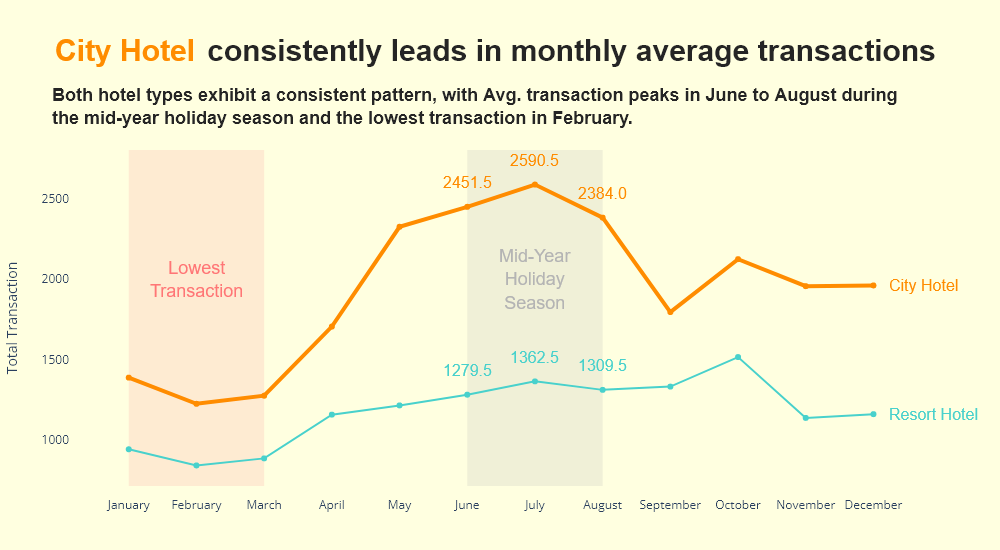

In [66]:
# Set Variable
colors = ['darkorange', 'mediumturquoise', 'darkorange', 'mediumturquoise', 'darkorange', 'mediumturquoise']
line = [4, 2]
highlight_01 = transaction_month[(transaction_month.month == "June") |
                                 (transaction_month.month == "July") |
                                 (transaction_month.month == "August")].reset_index()
highlight_02 = transaction_month[transaction_month.month == "December"].reset_index()

# ----------------------------------------------------------------------------------------------------------------------
# Make Plot
fig = px.line(transaction_month, x="month", y="avg", color='hotel',
              color_discrete_map = {'City Hotel': 'darkorange', 'Resort Hotel': 'mediumturquoise'},
             markers=True)

# ------------------------------------------------------------------------------------------------------------------------
# Adding Annotation Parameters


annotations = []

annotations.append(dict(xref='paper', yref='paper', x=-0.03, y=1.35,
                              align = "left",
                              text='<b>City Hotel<b>',
                              font=dict(family='Arial',
                                        size=30,
                                        color='darkorange'),
                              showarrow=False))

annotations.append(dict(xref='paper', yref='paper', x=0.13, y=1.35,
                              align = "left",
                              text='<b> consistently leads in monthly average transactions<b>',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

annotations.append(dict(xref='paper', yref='paper', x=-0.20, y=1.2,
                              align = "left",
                              text='<b>\
                              Both hotel types exhibit a consistent pattern, with Avg. transaction peaks in June to August during <br>\
                              the mid-year holiday season and the lowest transaction in February.<b>',
                              font=dict(family='Arial',
                                        size=18,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

annotations.append(dict(x=6, y=2000,
                              text='Mid-Year<br>Holiday<br>Season',
                              font=dict(family='Arial',
                                        size=18,
                                        color='rgb(180,180,180)'),
                              showarrow=False))

annotations.append(dict(x=1, y=2000,
                              text='Lowest<br>Transaction',
                              font=dict(family='Arial',
                                        size=18,
                                        color='rgb(255,118,118)'),
                              showarrow=False))

for i in range(0,6):
    annotations.append(dict(x=highlight_01.month[i], 
                            y=(highlight_01.avg[i])+150,
                            text=highlight_01.avg[i].astype(str),
                            font=dict(family='Arial',
                                      size=16,
                                      color=colors[i]),
                            showarrow=False))
    
for i in range(0,2):
    annotations.append(dict(x=11.2, 
                            y=(highlight_02.avg[i]),
                            xanchor='left',
                            text=highlight_02.hotel[i],
                            font=dict(family='Arial',
                                      size=16,
                                      color=colors[i]),
                            showarrow=False))

# ------------------------------------------------------------------------------------------------------------------
# Updating Layout

fig.update_layout(
    autosize=False,
    width=1000,
    height=550,
    margin=dict(
        l=80,
        r=20,
        b=50,
        t=150,
        pad=10
    ),
    paper_bgcolor="LightYellow",
    plot_bgcolor="LightYellow",
    annotations=annotations,
    showlegend = False
)

# Add shape regions
fig.add_vrect(
    x0="5", x1="7",
    fillcolor="rgb(180,180,180)", opacity=0.2,
    layer="below", line_width=0,
)

fig.add_vrect(
    x0="0", x1="2",
    fillcolor="rgb(249,155,155)", opacity=0.2,
    layer="below", line_width=0,
)

# set Line Width
fig['data'][0]['line']['width']=4

# Set axis title
fig.update_xaxes(title_text="", showgrid=False, zeroline=False)
fig.update_yaxes(title_text="Total Transaction", showgrid=False, zeroline=False)

fig.show('png')

Having previously determined the consistent upward trend in transaction volume each month, a plot illustrating the average monthly transaction volume was generated, as depicted in the above graph. The graph clearly indicates a noteworthy impact of the mid-year holiday season on hotel room reservations. Specifically, the months of June to August stand out for both hotel types, registering high levels of room bookings, with city hotels experiencing their highest reservation rates during these months.

As noted in the earlier analysis, March emerges as a month with a relatively low transaction contribution, trailing behind February, which holds the record for the lowest average transactions. This pattern is attributed to the lack of transaction data in February 2019, as revealed in the historical monthly transaction graph. This absence results in a smaller average compared to March, which, based on the historical monthly transaction graph, would likely have been a month with the lowest average transactions.

## B. Cancelation Rate Based on Duration

In [67]:
# Categorizing The Stay Duration
def duration_category(x):
    if x == 0 :
        return '0'
    elif x <= 1 :
        return '1 Night'
    elif x <= 3 :
        return '2-3 Nights'
    elif x <= 5 :
        return '4-5 Nights'
    elif x <= 7 :
        return '6-7 Nights'
    elif x <= 9 :
        return '8-9 Nights'
    elif x <= 14 :
        return '10-14 Nights'
    elif x > 14 :
        return '>14 Nights'
    else :
        return 'Others'
    
dfhotel['stay_duration_cat'] = dfhotel.stay_duration.apply(lambda x: duration_category(x))
dfhotel.head(3)

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration,date,adr_cat,stay_duration_cat
2,2,Resort Hotel,0,7,2017,September,36,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out,1,1,2017-09-01,15,1 Night
4,4,Resort Hotel,0,14,2017,September,36,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out,2,2,2017-09-01,20,2-3 Nights
5,6,Resort Hotel,0,0,2017,September,36,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,107.0,0,0,Check-Out,2,2,2017-09-01,22,2-3 Nights


In [68]:
# Make New DataFrame
stay_cat = dfhotel.groupby(['stay_duration_cat', 'hotel', 'is_canceled']).index.count().reset_index().rename({'index':'transaction'}, axis=1)
stay_cat_p = dfhotel.groupby(['stay_duration_cat', 'hotel', 'is_canceled']).index.count()
stay_cat_p = round((stay_cat_p/stay_cat_p.groupby(['stay_duration_cat', 'hotel']).sum()*100),2).reset_index().rename({'index':'percentage'}, axis=1)
stay_cat = stay_cat.merge(stay_cat_p, how='left', on=['stay_duration_cat', 'hotel', 'is_canceled'])

# Sorting lead_time_cat
stay_cat['stay_duration_cat'] = pd.Categorical(stay_cat['stay_duration_cat'], ordered=True, 
                              categories= ['0', '1 Night', '2-3 Nights', '4-5 Nights', '6-7 Nights', '8-9 Nights', '10-14 Nights', '>14 Nights', 'Others'])
stay_cat = stay_cat.sort_values(['stay_duration_cat', 'hotel'])

# Filter by Canceled only
stay_cat = stay_cat.query('is_canceled == 1').reset_index(drop='inddex')

# Additional Column For Labeling
stay_cat['cancel_label'] = stay_cat['hotel'] + ' Cancelation Rate'
stay_cat['trans_label'] = stay_cat['hotel'] + ' Transaction'
stay_cat.head(3)

,stay_duration_cat,hotel,is_canceled,transaction,percentage,cancel_label,trans_label
0,1 Night,City Hotel,1,2184,22.58,City Hotel Cancelation Rate,City Hotel Transaction
1,1 Night,Resort Hotel,1,797,13.05,Resort Hotel Cancelation Rate,Resort Hotel Transaction
2,2-3 Nights,City Hotel,1,7092,31.01,City Hotel Cancelation Rate,City Hotel Transaction


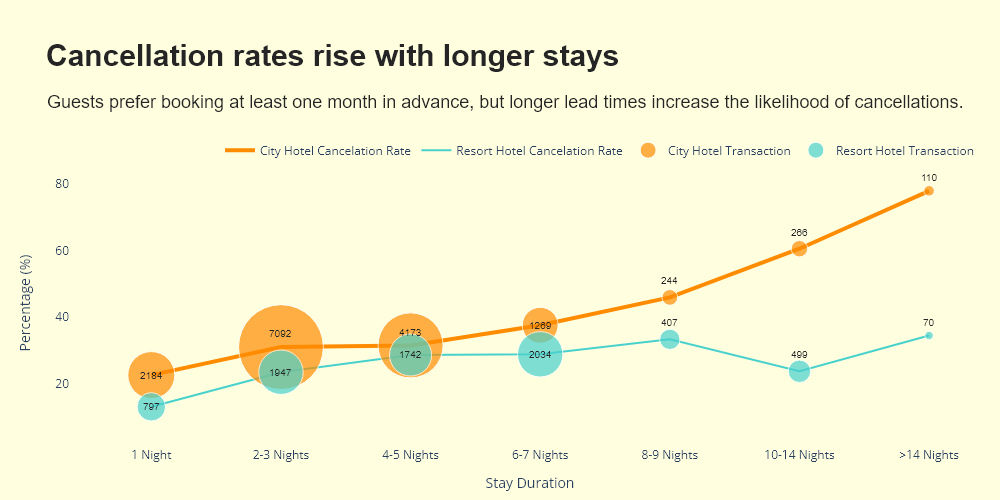

In [69]:
# Make Plot

fig1 = px.line(stay_cat, x="stay_duration_cat", y="percentage", color='cancel_label',
              color_discrete_map = {'City Hotel Cancelation Rate': 'darkorange', 'Resort Hotel Cancelation Rate': 'mediumturquoise'})

fig2 = px.scatter(stay_cat, x="stay_duration_cat", y="percentage",
         size="transaction", color="trans_label", hover_name="hotel", size_max=60, 
            color_discrete_map = {'City Hotel Transaction': 'darkorange', 'Resort Hotel Transaction': 'mediumturquoise'})

fig = go.Figure(data=fig1.data + fig2.data)

# ------------------------------------------------------------------------------------------------------------------------
# Adding Annotation Parameters

annotations = []

# Title
annotations.append(dict(xref='paper', yref='paper', x=-0.04, y=1.5,
                              align = "left",
                              text='<b>Cancellation rates rise with longer stays<b>',
                              font=dict(family='Arial',
                                        size=30,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

annotations.append(dict(xref='paper', yref='paper', x=-0.2, y=1.3,
                              align = "left",
                              text='\
                             Guests prefer booking at least one month in advance, but longer lead times increase the likelihood of cancellations.',
                              font=dict(family='Arial',
                                        size=18,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

# Adding Label of Total Transaction
# Row 0-1
for i in range(0,2):
    annotations.append(dict(x=stay_cat['stay_duration_cat'][i], y=stay_cat['percentage'][i],
                              text=stay_cat['transaction'][i].astype(str),
                              font=dict(family='Arial',
                                        size=10,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

# Row 2, 4
for i in range(2,5,2):
    annotations.append(dict(x=stay_cat['stay_duration_cat'][i], y=stay_cat['percentage'][i]+4,
                              text=stay_cat['transaction'][i].astype(str),
                              font=dict(family='Arial',
                                        size=10,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

# Row 3, 5
for i in range(3,6,2):
    annotations.append(dict(x=stay_cat['stay_duration_cat'][i], y=stay_cat['percentage'][i],
                              text=stay_cat['transaction'][i].astype(str),
                              font=dict(family='Arial',
                                        size=10,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
    
# Row 6-7
for i in range(6,8):
    annotations.append(dict(x=stay_cat['stay_duration_cat'][i], y=stay_cat['percentage'][i],
                              text=stay_cat['transaction'][i].astype(str),
                              font=dict(family='Arial',
                                        size=10,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

# Row 8-11
for i in range(8,12):
    annotations.append(dict(x=stay_cat['stay_duration_cat'][i], y=stay_cat['percentage'][i]+5,
                              text=stay_cat['transaction'][i].astype(str),
                              font=dict(family='Arial',
                                        size=10,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

# Row 12-13
for i in range(12,14):
    annotations.append(dict(x=stay_cat['stay_duration_cat'][i], y=stay_cat['percentage'][i]+4,
                              text=stay_cat['transaction'][i].astype(str),
                              font=dict(family='Arial',
                                        size=10,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

# ------------------------------------------------------------------------------------------------------------------
# Updating Layout

fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=80,
        r=20,
        b=60,
        t=170,
        pad=10
    ),
    paper_bgcolor="LightYellow",
    plot_bgcolor="LightYellow",
    annotations=annotations,
    legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1)
)

# set Line Width
fig['data'][0]['line']['width']=4

fig.update_xaxes(title_text="Stay Duration", showgrid=False, zeroline=False)
fig.update_yaxes(title_text="Percentage (%)", showgrid=False, zeroline=False)

fig.show('png')

Cancellation percentages tend to rise with longer stays in both City Hotels and Resort Hotels. Notably, Resort Hotels exhibit a temporary anomaly with a decrease in cancellation rates during the 10-14 night stay range, before resuming the overall increasing trend. City hotel guests usually stay for 2-3 nights, while resort hotel guests generally opt for a 6-7 night duration.

## C. Cancelation Rate based on Lead Time

In [70]:
# Categorizing The Lead Time
def lead_time_category(x):
    if x == 0 :
        return 'On the Spot'
    elif x <= 3 :
        return '1-3 Days'
    elif x <= 7 :
        return '4-7 Days'
    elif x <= 14 :
        return '8-14 Days'
    elif x <= 30 :
        return '15-30 Days'
    elif x <= 90 :
        return '1-3 Months'
    elif x <= 180 :
        return '4-6 Months'
    elif x <= 360 :
        return '6-12 Months'
    elif x <= 720 :
        return '1-2 Years'
    else :
        return '>2 Years'
    
dfhotel['lead_time_cat'] = dfhotel.lead_time.apply(lambda x: lead_time_category(x))
dfhotel.head(3)

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration,date,adr_cat,stay_duration_cat,lead_time_cat
2,2,Resort Hotel,0,7,2017,September,36,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out,1,1,2017-09-01,15,1 Night,4-7 Days
4,4,Resort Hotel,0,14,2017,September,36,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out,2,2,2017-09-01,20,2-3 Nights,8-14 Days
5,6,Resort Hotel,0,0,2017,September,36,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,107.0,0,0,Check-Out,2,2,2017-09-01,22,2-3 Nights,On the Spot


In [71]:
# Make New DataFrame
lead_cat = dfhotel.groupby(['lead_time_cat', 'hotel', 'is_canceled']).index.count().reset_index().rename({'index':'transaction'}, axis=1)
lead_cat_p = dfhotel.groupby(['lead_time_cat', 'hotel', 'is_canceled']).index.count()
lead_cat_p = round((lead_cat_p/lead_cat_p.groupby(['lead_time_cat', 'hotel']).sum()*100),2).reset_index().rename({'index':'percentage'}, axis=1)
lead_cat = lead_cat.merge(lead_cat_p, how='left', on=['lead_time_cat', 'hotel', 'is_canceled'])

# Sorting lead_time_cat
lead_cat['lead_time_cat'] = pd.Categorical(lead_cat['lead_time_cat'], ordered=True, 
                              categories= ['On the Spot', '1-3 Days', '4-7 Days', '8-14 Days', '15-30 Days', '1-3 Months', '4-6 Months', '6-12 Months', '1-2 Years', '>2 Years'])
lead_cat = lead_cat.sort_values(['lead_time_cat', 'hotel'])

# Filter by Canceled only
lead_cat = lead_cat.query('is_canceled == 1').reset_index(drop='index')

# Additional Column For Labeling
lead_cat['cancel_label'] = lead_cat['hotel'] + ' Cancelation Rate'
lead_cat['trans_label'] = lead_cat['hotel'] + ' Transaction'

lead_cat.head(3)

,lead_time_cat,hotel,is_canceled,transaction,percentage,cancel_label,trans_label
0,On the Spot,City Hotel,1,196,7.74,City Hotel Cancelation Rate,City Hotel Transaction
1,On the Spot,Resort Hotel,1,120,4.55,Resort Hotel Cancelation Rate,Resort Hotel Transaction
2,1-3 Days,City Hotel,1,333,9.69,City Hotel Cancelation Rate,City Hotel Transaction


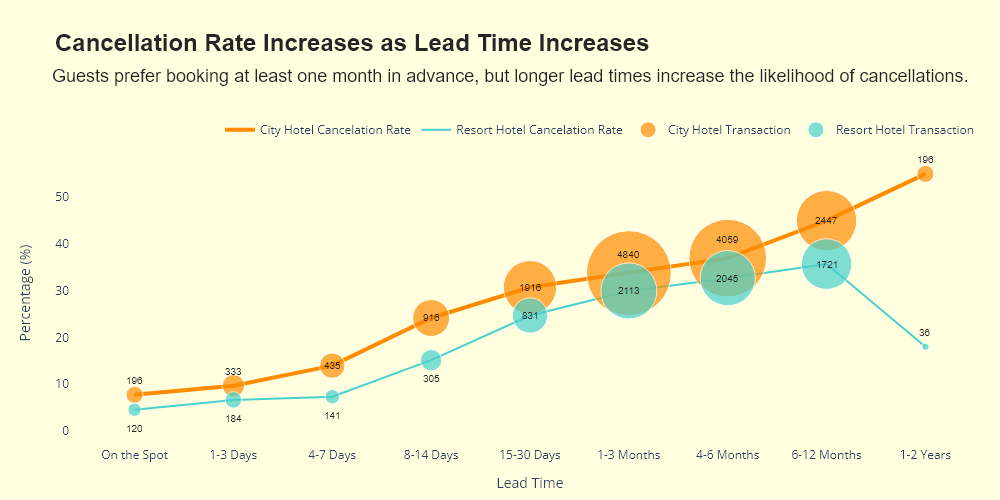

In [72]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

df = px.data.gapminder()

fig1 = px.line(lead_cat, x="lead_time_cat", y="percentage", color='cancel_label',
              color_discrete_map = {'City Hotel Cancelation Rate': 'darkorange', 'Resort Hotel Cancelation Rate': 'mediumturquoise'})

fig2 = px.scatter(lead_cat, x="lead_time_cat", y="percentage",
         size="transaction", color="trans_label", hover_name="hotel", size_max=60, 
            color_discrete_map = {'City Hotel Transaction': 'darkorange', 'Resort Hotel Transaction': 'mediumturquoise'})

fig = go.Figure(data=fig1.data + fig2.data)

# ------------------------------------------------------------------------------------------------------------------------
# Adding Annotation Parameters

annotations = []

annotations.append(dict(xref='paper', yref='paper', x=-0.03, y=1.43,
                              align = "left",
                              text='<br><b>Cancellation Rate Increases as Lead Time Increases<b>',
                              font=dict(family='Arial',
                                        size=24,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

annotations.append(dict(xref='paper', yref='paper', x=-0.20, y=1.3,
                              align = "left",
                              text='\
                              Guests prefer booking at least one month in advance, but longer lead times increase the likelihood of cancellations.',
                              font=dict(family='Arial',
                                        size=18,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

# Adding Label of Total Transaction
# Row 0-1
for i in range(0,3,2):
    annotations.append(dict(x=lead_cat['lead_time_cat'][i], y=lead_cat['percentage'][i]+3,
                              text=lead_cat['transaction'][i].astype(str),
                              font=dict(family='Arial',
                                        size=10,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

# Row 0-1
for i in range(1,8,2):
    annotations.append(dict(x=lead_cat['lead_time_cat'][i], y=lead_cat['percentage'][i]-4,
                              text=lead_cat['transaction'][i].astype(str),
                              font=dict(family='Arial',
                                        size=10,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
    
# Row 0-1
for i in range(4,7,2):
    annotations.append(dict(x=lead_cat['lead_time_cat'][i], y=lead_cat['percentage'][i],
                              text=lead_cat['transaction'][i].astype(str),
                              font=dict(family='Arial',
                                        size=10,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

# Row 0-1
for i in range(8,10):
    annotations.append(dict(x=lead_cat['lead_time_cat'][i], y=lead_cat['percentage'][i],
                              text=lead_cat['transaction'][i].astype(str),
                              font=dict(family='Arial',
                                        size=10,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

# Row 0-1
for i in range(10,13,2):
    annotations.append(dict(x=lead_cat['lead_time_cat'][i], y=lead_cat['percentage'][i]+4,
                              text=lead_cat['transaction'][i].astype(str),
                              font=dict(family='Arial',
                                        size=10,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

# Row 0-1
for i in range(11,12):
    annotations.append(dict(x=lead_cat['lead_time_cat'][i], y=lead_cat['percentage'][i],
                              text=lead_cat['transaction'][i].astype(str),
                              font=dict(family='Arial',
                                        size=10,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
    
# Row 0-1
for i in range(13,16):
    annotations.append(dict(x=lead_cat['lead_time_cat'][i], y=lead_cat['percentage'][i],
                              text=lead_cat['transaction'][i].astype(str),
                              font=dict(family='Arial',
                                        size=10,
                                        color='rgb(37,37,37)'),
                              showarrow=False))
    
# Row 0-1
for i in range(16,18):
    annotations.append(dict(x=lead_cat['lead_time_cat'][i], y=lead_cat['percentage'][i]+3,
                              text=lead_cat['transaction'][i].astype(str),
                              font=dict(family='Arial',
                                        size=10,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

# ------------------------------------------------------------------------------------------------------------------
# Updating Layout

fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    margin=dict(
        l=80,
        r=20,
        b=50,
        t=150,
        pad=10
    ),
    paper_bgcolor="LightYellow",
    plot_bgcolor="LightYellow",
    annotations=annotations,
    legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1)
)

# set Line Width
fig['data'][0]['line']['width']=4
fig.update_xaxes(title_text="Lead Time", tickangle=0, showgrid=False, zeroline=False)
fig.update_yaxes(title_text="Percentage (%)", showgrid=False, zeroline=False)

fig.show('png')

The percentage of cancellations appears to be constantly increasing along with increasing lead time for both City Hotel and Resort Hotel types.
However, at Resort Hotels, there is an anomaly in the lead time range of 1-2 years with a decrease in cancellation rates. Additionally, guests tend to prefer booking at least one month before their stay date.

<br>
<br>
<hr style="border:2px solid black">
<hr style="border:6px solid black">
<br>

# SUMMARY
<hr style="border:1px solid black">

1. The City Hotel stands out as the most popular type, with room bookings comprising 62% of the total transactions.
2. The mid-year holiday season (June, July, August) substantially contributes to elevated room booking levels for both hotel types.
3. The months in the first quarter (January, February, March) consistently represent the period with the lowest transaction contributions each year.
4. As the duration of the stay increases, the probability of reservation cancellations also rises.
5. City hotel guests usually stay for 2-3 nights, while resort hotel guests generally opt for a 6-7 night duration.
6. Guests prefer booking at least one month in advance, but longer lead times increase the likelihood of cancellations.